In [1]:
import tensorflow as tf #used to build deep learning models and pipelines
import numpy as np #used for fast numerical operations
import matplotlib.pyplot as plt #ploting model training and evaluation
import pathlib #to path lib
import os #used for linux cmd
from tqdm import tqdm #graphical progress bar in pythin

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-07-31 04:53:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.192.208.155, 2600:1406:4400:2af::317f, 2600:1406:4400:2a5::317f, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.192.208.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  67.4MB/s    in 11s     

2023-07-31 04:53:47 (69.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [4]:
!ls "PetImages/"

Cat  Dog


In [5]:
len(os.listdir("PetImages/Cat"))

12501

In [6]:
len(os.listdir("PetImages/Dog"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
paths = DataPath.glob("*/*.jpg") #glob method fetch all the image paths
paths

<generator object Path.glob at 0x7dafaa63c6d0>

In [8]:
paths = list(paths)
paths[:10]

[PosixPath('PetImages/Cat/128.jpg'),
 PosixPath('PetImages/Cat/5178.jpg'),
 PosixPath('PetImages/Cat/7054.jpg'),
 PosixPath('PetImages/Cat/1189.jpg'),
 PosixPath('PetImages/Cat/11159.jpg'),
 PosixPath('PetImages/Cat/5733.jpg'),
 PosixPath('PetImages/Cat/10592.jpg'),
 PosixPath('PetImages/Cat/1749.jpg'),
 PosixPath('PetImages/Cat/1671.jpg'),
 PosixPath('PetImages/Cat/2042.jpg')]

In [9]:
paths = list(map(lambda x : str(x), paths)) #convert and returns the string and maps with all the training paths
paths[:10]

['PetImages/Cat/128.jpg',
 'PetImages/Cat/5178.jpg',
 'PetImages/Cat/7054.jpg',
 'PetImages/Cat/1189.jpg',
 'PetImages/Cat/11159.jpg',
 'PetImages/Cat/5733.jpg',
 'PetImages/Cat/10592.jpg',
 'PetImages/Cat/1749.jpg',
 'PetImages/Cat/1671.jpg',
 'PetImages/Cat/2042.jpg']

In [10]:
from random import shuffle

shuffle(paths)
paths[:10]

['PetImages/Cat/9223.jpg',
 'PetImages/Cat/1710.jpg',
 'PetImages/Cat/9318.jpg',
 'PetImages/Cat/2005.jpg',
 'PetImages/Cat/7797.jpg',
 'PetImages/Cat/7983.jpg',
 'PetImages/Cat/1027.jpg',
 'PetImages/Dog/11573.jpg',
 'PetImages/Cat/1057.jpg',
 'PetImages/Dog/7700.jpg']

In [11]:
#this function loops all the images decode them, neglect the error images and proceed with the remaining path
def TestImageQuality(paths):
    new_paths = []
    for path in tqdm(paths):
        try :
            image = tf.io.read_file(path)
            image = tf.io.decode_jpeg(image , channels = 3)
        except :
            continue
        new_paths.append(path)
    return new_paths

paths = TestImageQuality(paths)
paths[:10]

100%|██████████| 25000/25000 [00:35<00:00, 713.97it/s]


['PetImages/Cat/9223.jpg',
 'PetImages/Cat/1710.jpg',
 'PetImages/Cat/9318.jpg',
 'PetImages/Cat/2005.jpg',
 'PetImages/Cat/7797.jpg',
 'PetImages/Cat/7983.jpg',
 'PetImages/Cat/1027.jpg',
 'PetImages/Dog/11573.jpg',
 'PetImages/Cat/1057.jpg',
 'PetImages/Dog/7700.jpg']

In [12]:
len(os.listdir("PetImages/Dog"))

12501

In [13]:
# Takes in the an image path and return labels dog or cat
def get_label(image_path):
    return image_path.split("/")[-2]

labels = list(map(lambda x : get_label(x) , paths))
labels[:10]

['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog']

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)

labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [15]:
from sklearn.model_selection import train_test_split

train, val, trainlabels, vallabels = train_test_split(paths, labels)

In [16]:
train[:10], trainlabels[:10]

(['PetImages/Dog/12167.jpg',
  'PetImages/Dog/9517.jpg',
  'PetImages/Dog/2400.jpg',
  'PetImages/Cat/2728.jpg',
  'PetImages/Cat/3126.jpg',
  'PetImages/Dog/12438.jpg',
  'PetImages/Dog/8074.jpg',
  'PetImages/Dog/3503.jpg',
  'PetImages/Cat/3806.jpg',
  'PetImages/Cat/5130.jpg'],
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0]))

In [17]:
def load(image, label):
  image = tf.io.read_file(image) #read the img path and decode jpeg into tnesor
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [18]:
IMG_SIZE = 224
BATCH_SIZE = 128

#transormation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

#Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2)) #its negative so it zoom in
])

In [19]:
#### Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(pat , labels , train = True):
    imgpaths = tf.convert_to_tensor(pat)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(imgpaths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE) #input elements are independent of one another, the pre-processing can be parallelized across multiple CPU cores.
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [20]:
#creating train dataset and verify it

%time val_dataset = get_dataset(train , trainlabels)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 728 ms, sys: 22.7 ms, total: 751 ms
Wall time: 835 ms
(128, 224, 224, 3)
(128,)


Cat


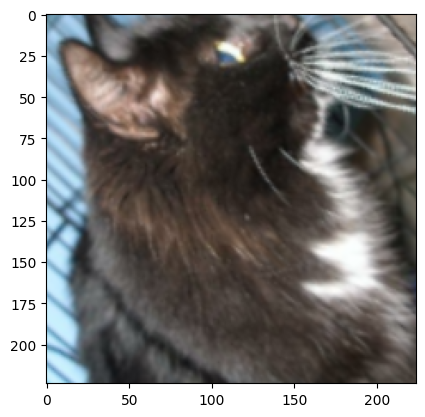

In [21]:
# View a sample Training Image
print(le.inverse_transform(label)[0]) #simulating a random variable having a continuous distribution
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [22]:
# This is used for model creation
from tensorflow.keras.models import Sequential #used to join multiple tenzor flow graph sequnetially
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization , GlobalMaxPool2D

model = Sequential()

# Block 1
model.add(Conv2D(input_shape=(224 , 224 , 3),  padding='same',filters=32, kernel_size=(7, 7)))
model.add(Activation('relu')) #relu - The function returns 0 if the input is negative, but for any positive input, it returns that value back
model.add(BatchNormalization()) #done along mini-batches instead of the full data set
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #to reduce overfitting in a model.

# Block 2
model.add(Conv2D(filters=64,  padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256 , kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #The dense layer is a simple Layer of neurons in which each neuron receives input from all the neurons of the previous layer, thus called as dense
model.add(Activation('sigmoid')) #the function determines which value to pass as output and what not to pass as output

In [23]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)     

In [24]:
model.compile(
    loss = 'binary_crossentropy', # The loss function is used to measure the model's performance during training and guide the optimization process. binary classification problems, where the model predicts probabilities for two classes. The binary cross-entropy loss is suitable for training a model with a sigmoid activation function in the final layer.
    optimizer = 'adam', #optimizer determines how the model's weights are updated based on the calculated loss during training
    metrics = ['accuracy']
)

In [25]:
# Train the model
history = model.fit(
    val_dataset,
    steps_per_epoch=len(train)//BATCH_SIZE,
    epochs=2,
    validation_data=val_dataset,
    validation_steps = len(val)//BATCH_SIZE,
)

Epoch 1/2
145/145 [==============================] - 6463s 44s/step - loss: 0.8090 - accuracy: 0.5833 - val_loss: 0.7811 - val_accuracy: 0.5155
Epoch 2/2
145/145 [==============================] - 6210s 43s/step - loss: 0.6029 - accuracy: 0.6710 - val_loss: 0.6008 - val_accuracy: 0.6766


there are some cnn architecture which includes
LeNet-5 which has three convolutional layers, 2 average pooling layers and 2 dense layers

AlexNet larger input and filter size

VGG comes with 2 variant one with 16 other with 19.

ResNet

In [1]:
val_steps = len(val) // BATCH_SIZE
loss, acc = model.evaluate(val_dataset, steps=val_steps)

print("Testing Acc:", acc)
print("Testing Loss:", loss)

NameError: ignored